## Python 完整實作 (使用 NumPy)

現在我們可以把上面的數學公式寫成程式碼。**將梯度計算「函式化」** (即 `compute_gradient`)。
這份程式碼實作的是「**批次梯度下降 (Batch Gradient Descent)**」，因為它在每一步都使用了**所有**的訓練樣本 ( $N$ 個) 來計算梯度。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_gradient(X, y_true, w, b):
    """
    計算線性迴歸的梯度。
    
    Args:
        X (np.array): 訓練資料 (特徵)
        y_true (np.array): 訓練資料 (真實標籤)
        w (float): 目前的權重 (斜率)
        b (float): 目前的權重 (截距)
        
    Returns:
        tuple: (grad_w, grad_b) 梯度的值
    """
    num_samples = len(y_true)
    
    # 1. 計算預測值 (Forward pass)
    # y_pred = w * X + b
    y_pred = (w * X) + b
    
    # 2. 計算誤差
    # error = y_pred - y_true
    error = y_pred - y_true
    
    # 3. 根據數學公式計算梯度 (Backward pass)
    # grad_w = (2/N) * sum(X * error)
    grad_w = (2 / num_samples) * np.sum(X * error)
    
    # grad_b = (2/N) * sum(error)
    grad_b = (2 / num_samples) * np.sum(error)
    
    return grad_w, grad_b

def gradient_descent(X, y_true, learning_rate, num_epochs):
    """
    執行完整的梯度下降訓練迴圈。
    
    Args:
        X (np.array): 訓練資料 (特徵)
        y_true (np.array): 訓練資料 (真實標籤)
        learning_rate (float): 學習率 (alpha)
        num_epochs (int): 迭代次數 (epochs)
        
    Returns:
        tuple: (w_final, b_final, loss_history) 訓練後的權重與損失紀錄
    """
    # 初始化權重
    w = 0.0  # 隨機初始化或設為 0
    b = 0.0
    
    loss_history = []
    
    print(f"Start training... Learning Rate: {learning_rate}, Epochs: {num_epochs}")
    
    for i in range(num_epochs):        
        # 1. 計算梯度 (呼叫您要求的 gradient 函式)
        grad_w, grad_b = compute_gradient(X, y_true, w, b)
        
        # 2. 更新權重 (核心步驟)
        # w = w - alpha * grad_w
        # b = b - alpha * grad_b
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b  
        
        # (可選) 計算並記錄當前的 Loss
        y_pred = (w * X) + b
        loss = np.mean((y_pred - y_true) ** 2)
        loss_history.append(loss)
        
        if (i + 1) % 100 == 0:
            print(f"Epoch [{i+1}/{num_epochs}], Loss: {loss:.4f}, w: {w:.4f}, b: {b:.4f}")
            
    print("Training completed!")
    return w, b, loss_history


完成了 compute_gradient 和 gradient_descent 的實作後，讓我們來直接跑跑看

In [2]:
# 1. 產生模擬資料
# 讓我們假裝真實的 w = 3, b = 4
np.random.seed(42)
X_train = 2 * np.random.rand(100) # 100 個 0~2 之間的點
y_train = 4 + 3 * X_train + np.random.randn(100) * 0.5 # y = 4 + 3x + 雜訊

# 2. 設定超參數
learning_rate = 0.01
num_epochs = 1000

# 3. 執行梯度下降
w_final, b_final, loss_history = gradient_descent(X_train, y_train, learning_rate, num_epochs)

# 4. 輸出最終結果
print(f"\n--- 最終結果 ---")
print(f"真實模型: y = 3.0 * x + 4.0")
print(f"學到模型: y = {w_final:.4f} * x + {b_final:.4f}")



Start training... Learning Rate: 0.01, Epochs: 1000
Epoch [100/1000], Loss: 0.3299, w: 3.3821, b: 3.4359
Epoch [200/1000], Loss: 0.2612, w: 3.2764, b: 3.6627
Epoch [300/1000], Loss: 0.2318, w: 3.1642, b: 3.7914
Epoch [400/1000], Loss: 0.2169, w: 3.0837, b: 3.8825
Epoch [500/1000], Loss: 0.2094, w: 3.0265, b: 3.9474
Epoch [600/1000], Loss: 0.2056, w: 2.9857, b: 3.9936
Epoch [700/1000], Loss: 0.2036, w: 2.9567, b: 4.0264
Epoch [800/1000], Loss: 0.2027, w: 2.9360, b: 4.0498
Epoch [900/1000], Loss: 0.2022, w: 2.9214, b: 4.0664
Epoch [1000/1000], Loss: 0.2019, w: 2.9109, b: 4.0783
Training completed!

--- 最終結果 ---
真實模型: y = 3.0 * x + 4.0
學到模型: y = 2.9109 * x + 4.0783


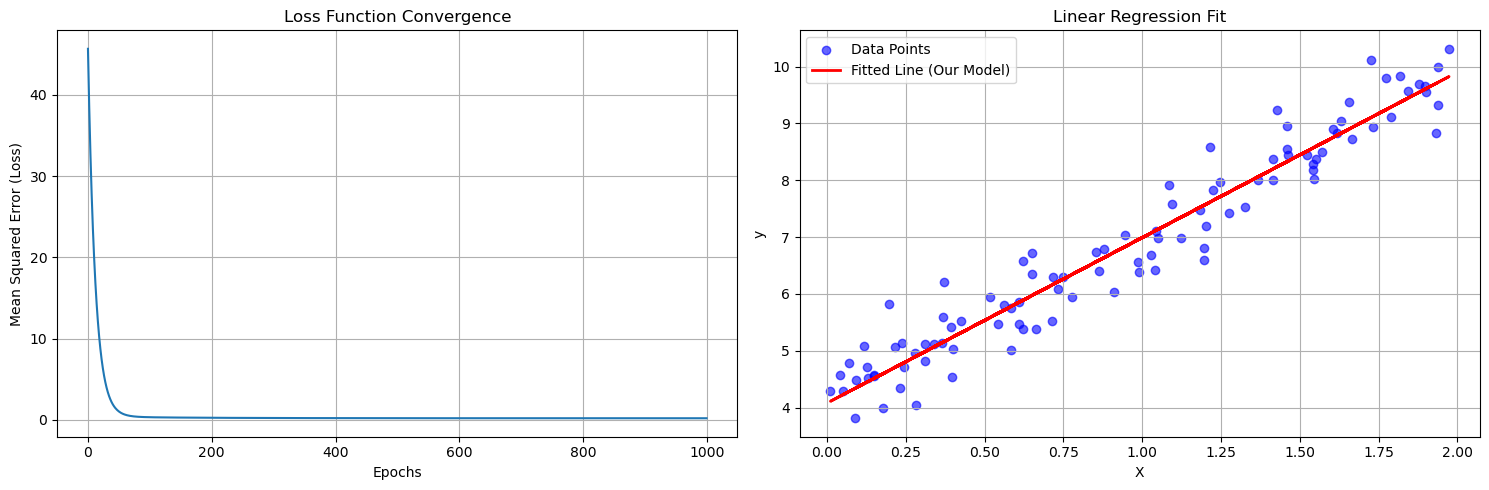

In [3]:
# 5. 繪製結果
plt.figure(figsize=(15, 5))

# 圖一：Loss 下降曲線
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss Function Convergence")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.grid(True)

# 圖二：模型擬合結果
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Data Points', alpha=0.6)
y_pred_final = w_final * X_train + b_final
plt.plot(X_train, y_pred_final, color='red', linewidth=2, label='Fitted Line (Our Model)')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()